# Credit Card Fraud

### Import Packages

In [ ]:
import pycaret
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import scipy.stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split


### Read CSV file from Pandas

In [5]:
credit = pd.read_csv('creditcard.csv')
credit.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### Understand the Data Set

In [3]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
credit.shape

(284807, 31)

In [5]:
credit[['Time', 'Amount', 'Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


### Imbalanced Class Feature

Distribuition of Normal(0) and Frauds(1): 
0    284315
1       492
Name: Class, dtype: int64


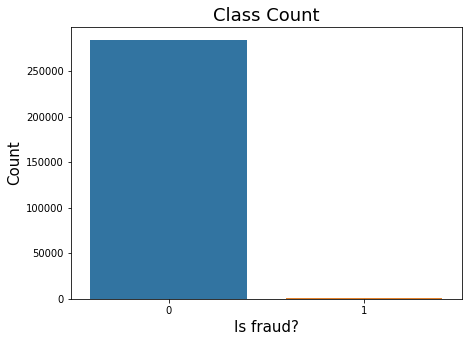

In [6]:
print("Distribuition of Normal(0) and Frauds(1): ")
print(credit["Class"].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(credit['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Is fraud?", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

## Feature Engineering

### Split the Time feature into Time_min and Time_hour

In [7]:
timedelta = pd.to_timedelta(credit['Time'], unit='s')
credit['Time_min'] = (timedelta.dt.components.minutes).astype(int)
credit['Time_hour'] = (timedelta.dt.components.hours).astype(int)

### Exploring the distribution by Class type through Hours and Minutes

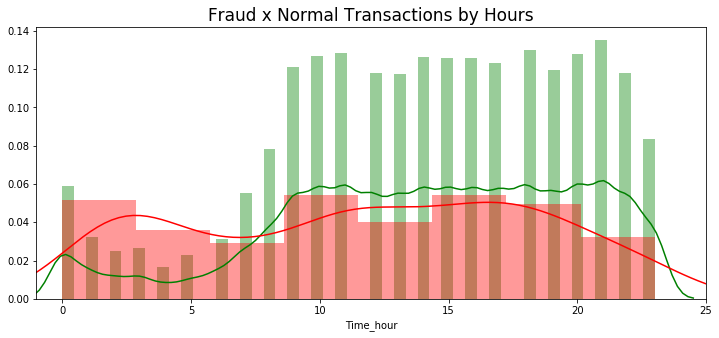

In [8]:
#Exploring the distribuition by Class types throught hours and minutes
plt.figure(figsize=(12,5))
sns.distplot(credit[credit['Class'] == 0]["Time_hour"], color='g')
sns.distplot(credit[credit['Class'] == 1]["Time_hour"], color='r')
plt.title('Fraud x Normal Transactions by Hours', fontsize=17)
plt.xlim([-1,25])
plt.show()

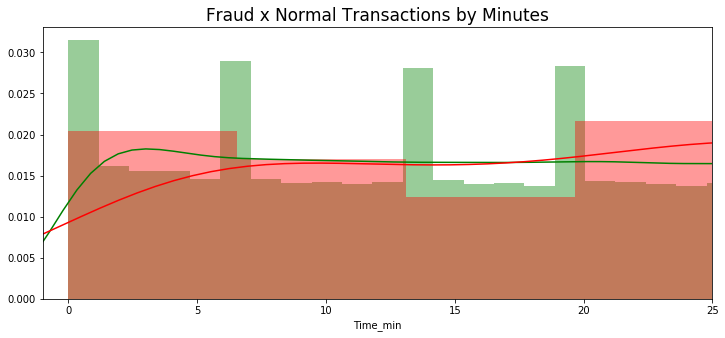

In [9]:
#Exploring the distribuition by Class types throught hours and minutes
plt.figure(figsize=(12,5))
sns.distplot(credit[credit['Class'] == 0]["Time_min"], color='g')
sns.distplot(credit[credit['Class'] == 1]["Time_min"], color='r')
plt.title('Fraud x Normal Transactions by Minutes', fontsize=17)
plt.xlim([-1,25])
plt.show()

## credit['Amount_log'] = np.log(credit['Amount'])

### Plot Class feature and understand the distribution 

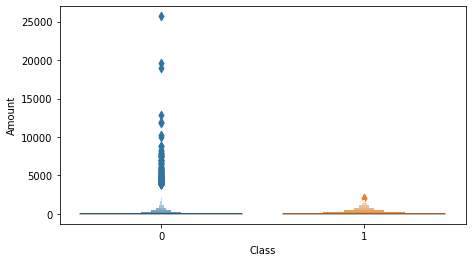

In [11]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
sns.boxenplot(x = credit['Class'], y = credit['Amount'], data = credit)


### Apply Log transformation into Class Feature and Plot the graph

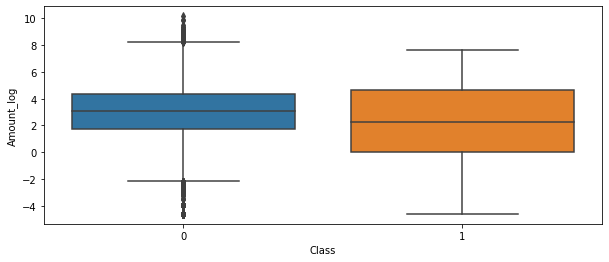

In [13]:
plt.figure(figsize=(10, 4))
sns.boxplot(x = credit['Class'], y = credit['Amount_log'], data = credit)
plt.show()

### Amount by Minutes and Hours of Fraud and Normal Transactions


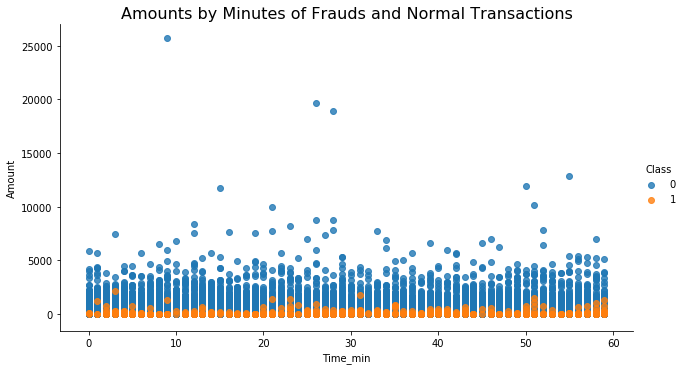

In [14]:
ax = sns.lmplot(y="Amount", x="Time_min", fit_reg=False,aspect=1.8, data=credit, hue='Class')
plt.title("Amounts by Minutes of Frauds and Normal Transactions",fontsize=16)
plt.show()

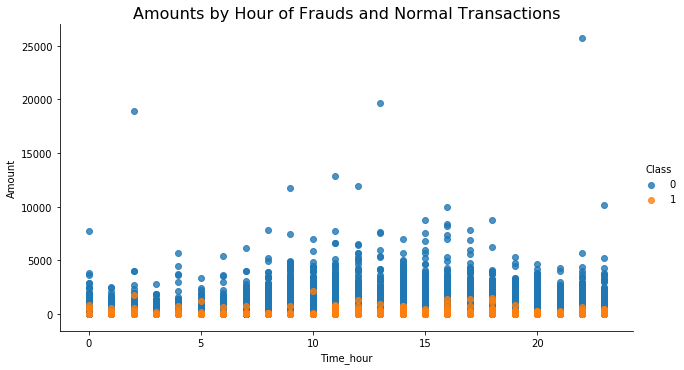

In [15]:
ax = sns.lmplot(y="Amount", x="Time_hour", fit_reg=False,aspect=1.8, data=credit, hue='Class')
plt.title("Amounts by Hour of Frauds and Normal Transactions",fontsize=16)
plt.show()

In [16]:
columns = credit.iloc[:,1:30].columns
print(columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


### Visualize features V1 to V29 and get inference

Exception has been handled!
Exception has been handled!


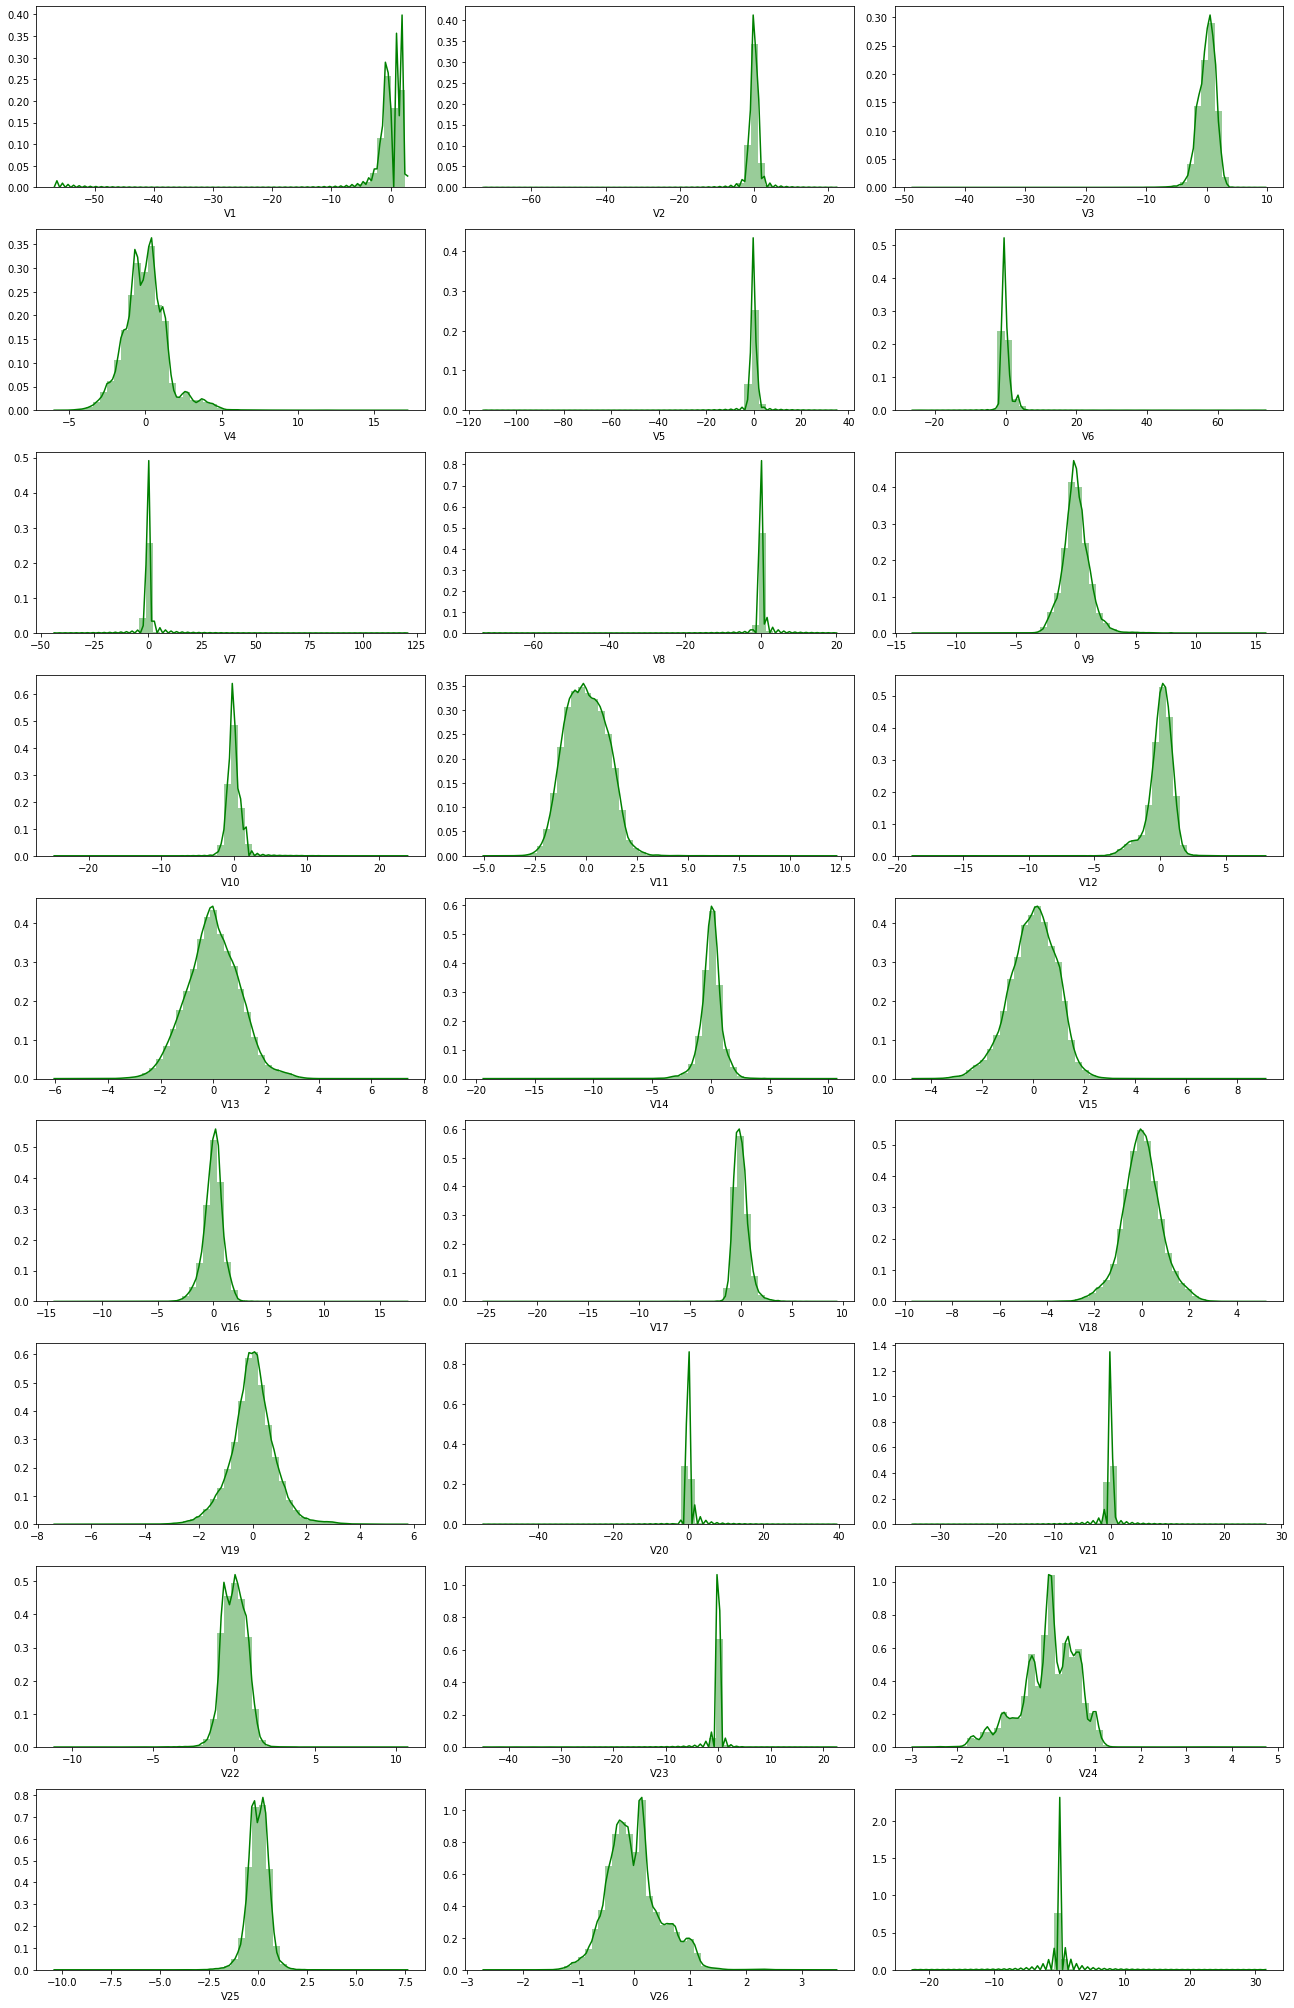

In [17]:
fig = plt.figure(figsize=(18,28))
for i in range(len(columns)):
    try:
        i +=1
        fig.add_subplot(9, 3, i)
        sns.distplot(credit.iloc[:, i], bins = 50, color='g') 
        #sns.scatterplot(credit.iloc[:, i],credit['Amount'])
    except ValueError:
        print('Exception has been handled!')
plt.tight_layout()
plt.show()

##### Based on the Bivariant Analysis, we have identified V2, V3, V4, V9, V10, V11, V12, V14, V16, V17, V18 and V19 features.

In [18]:
credit = credit[['Time_hour','Time_min','V2','V3','V4','V9','V10','V11','V12','V14','V16','V17',
                       'V18','V19','Amount','Class']]
credit.head()


,Time_hour,Time_min,V2,V3,V4,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class
0,0,0,-0.072781,2.536347,1.378155,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,149.62,0
1,0,0,0.266151,0.166480,0.448154,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,2.69,0
2,0,0,-1.340163,1.773209,0.379780,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,378.66,0
3,0,0,-0.185226,1.792993,-0.863291,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,123.50,0
4,0,0,0.877737,1.548718,0.403034,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,69.99,0


### Split x_train, x_val, y_train and y_val partition

In [6]:
# Predictors
X = credit.iloc[:,:-1]

# Target
y = credit.iloc[:,-1]

# Dividing the data into train and test subsets
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state=42)

## Model Implementation

### Logistic Regression

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.84      0.61      0.71       136

    accuracy                           1.00     85443
   macro avg       0.92      0.81      0.85     85443
weighted avg       1.00      1.00      1.00     85443

ROC_AUC_SCORE:  0.8050532798839348


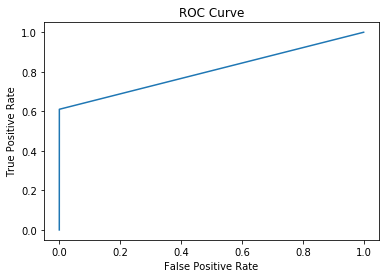

In [21]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_score = model.predict(x_val)
print(y_score)

auc = roc_auc_score(y_val, y_score)
print('Classification Report: ')
print(classification_report(y_val, y_score))
false_positive_rate, true_positive_rae, thresholds = roc_curve(y_val, y_score)
print('ROC_AUC_SCORE: ', roc_auc_score(y_val, y_score))

plt.plot(false_positive_rate, true_positive_rae)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Decision Tree Classifier

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.71      0.82      0.76       136

    accuracy                           1.00     85443
   macro avg       0.85      0.91      0.88     85443
weighted avg       1.00      1.00      1.00     85443

ROC_AUC_SCORE is 0.9114950914310183


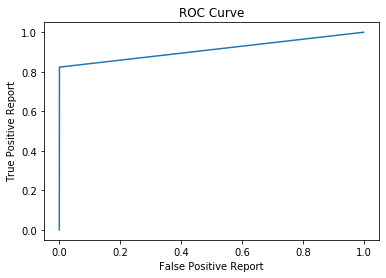

In [7]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_score = model.predict(x_val)

auc = roc_auc_score(y_val, y_score)
print('Classification Report:')
print(classification_report(y_val, y_score))
false_positive_rate, true_positive_rae, thresholds = roc_curve(y_val, y_score)
print('ROC_AUC_SCORE is', roc_auc_score(y_val, y_score))

plt.plot(false_positive_rate, true_positive_rae)
plt.xlabel('False Positive Report')
plt.ylabel('True Positive Report')
plt.title('ROC Curve')
plt.show()


### Features to be selected for Logistic Regression Model

In [23]:
#   selecting models
models = LogisticRegression()
#   using  rfe and selecting the features
rfe = RFE(models,15)
#   fitting the model
rfe = rfe.fit(X,y)
#   ranking features
feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
plt.show()
print('Features  to be selected for Logistic Regression model are:')
print(feature_ranking[feature_ranking.values==1].index.tolist())


Features  to be selected for Logistic Regression model are:
['Time_hour', 'Time_min', 'V2', 'V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'Amount']


### Features to be selected for Random Forrest Classifier

In [25]:
# Random Forrest classifier model
models = RandomForestClassifier()
#   using  rfe and selecting the features
rfe = RFE(models,15)
#   fitting the model
rfe = rfe.fit(X,y)
#   ranking features
feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
plt.show()
print('Features  to be selected for Random Forrest Classifier are:')
print(feature_ranking[feature_ranking.values==1].index.tolist())


Features  to be selected for Random Forrest Classifier are:
['Time_hour', 'Time_min', 'V2', 'V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'Amount']


### Plot the slected features from Random Forest Classifier

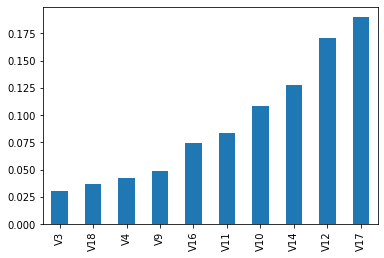

In [26]:
# splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# selecting the data
rfc = RandomForestClassifier(random_state=42)
# fitting the data
rfc.fit(X_train, y_train)
# predicting the data
y_pred = rfc.predict(X_test)
# feature importances
rfc_importances = pd.Series(rfc.feature_importances_, index=X.columns).sort_values().tail(10)
# plotting bar chart according to feature importance
rfc_importances.plot(kind='bar')
plt.show()

### Classification Report, Confusion Matrix and ROC Curve

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.94      0.81      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443

[[85300     7]
 [   26   110]]


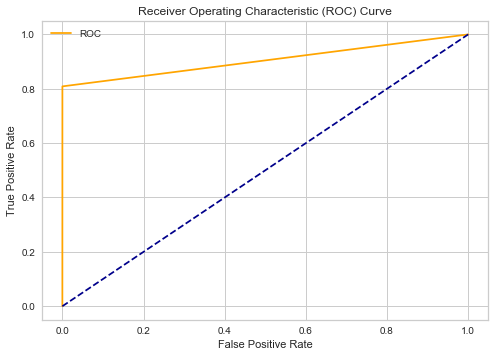

In [30]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
from yellowbrick.classifier import roc_auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


def grid_search(dataframe,target):
    
    # splitting the data
    x_train,x_val,y_train,y_val = train_test_split(dataframe,target, test_size=0.3, random_state=42)
    
    model = RandomForestClassifier(n_estimators=11, max_features='auto', max_depth=8, criterion='entropy',random_state=42)
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    print(classification_report(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))
    
    fper, tper, thresholds = roc_curve(y_val, y_pred) 
 
    
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

grid_search(X,y)

### Ensemble the Model

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier


# splitting the data  
x_train,x_val,y_train,y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# models to use for ensembling  
model1 = RandomForestClassifier()
model3 = GradientBoostingClassifier()
model2 = LogisticRegression()
# fitting the model
model = VotingClassifier(estimators=[('rf', model1), ('lr', model2), ('xgb',model3)], voting='soft')
model.fit(x_train,y_train)
# predicting balues and getting the metrics
y_pred = model.predict(x_val)


### Ensemble Model - Classification Report, Confusion Matrix and ROC Curve

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.94      0.67      0.78       136

    accuracy                           1.00     85443
   macro avg       0.97      0.83      0.89     85443
weighted avg       1.00      1.00      1.00     85443

[[85301     6]
 [   45    91]]


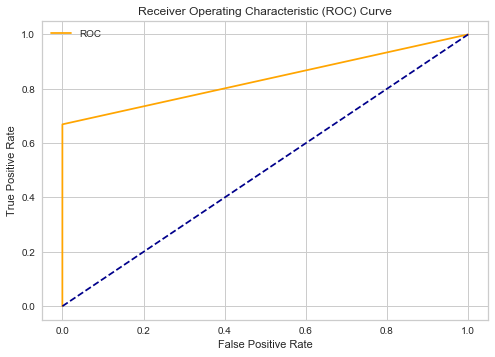

In [32]:
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
fper, tper, thresholds = roc_curve(y_val, y_pred) 
   
plt.plot(fper, tper, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Apply PyCaret package and get inferences

### Data for modeling and Unseen data for predictions

In [33]:
data = credit.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = credit.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (256326, 31)
Unseen Data For Predictions: (28481, 31)


### PyCaret - Preprocessing => Get complete details about the data set

In [36]:
from pycaret.classification import *

In [39]:
clas = setup(data = credit,  target = 'Class')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,4336
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(284807, 31)"
4,Missing Values,False
5,Numeric Features,30
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


### Compare Models

In [40]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extra Trees Classifier,0.9996,0.9651,0.8273,0.9392,0.8766,0.8764
1,CatBoost Classifier,0.9996,0.9751,0.8282,0.9358,0.8733,0.8731
2,Random Forest Classifier,0.9995,0.9566,0.8091,0.9154,0.8524,0.8522
3,Ada Boost Classifier,0.9995,0.9717,0.7891,0.9003,0.8382,0.8379
4,Extreme Gradient Boosting,0.9995,0.9806,0.81,0.9186,0.8567,0.8565
5,Linear Discriminant Analysis,0.9994,0.9947,0.78,0.8932,0.8295,0.8292
6,Decision Tree Classifier,0.9993,0.8953,0.7909,0.799,0.7886,0.7882
7,Logistic Regression,0.9992,0.9592,0.7527,0.7773,0.7613,0.7609
8,Gradient Boosting Classifier,0.999,0.7618,0.63,0.6986,0.6398,0.6394
9,Ridge Classifier,0.9989,0,0.4536,0.8924,0.5928,0.5924


### Decision Tree

In [41]:
DecisionTree  = create_model('dt')   

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9997,0.9998,1.0000,0.8333,0.9091,0.9089
1,0.9997,0.9499,0.9000,0.9000,0.9000,0.8998
2,0.9988,0.8497,0.7000,0.6364,0.6667,0.6661
3,0.9993,0.8998,0.8000,0.8000,0.8000,0.7997
4,0.9993,0.8499,0.7000,0.8750,0.7778,0.7774
5,0.9990,0.8180,0.6364,0.7778,0.7000,0.6995
6,0.9995,0.9090,0.8182,0.9000,0.8571,0.8569
7,0.9992,0.8181,0.6364,0.8750,0.7368,0.7364
8,0.9988,0.9087,0.8182,0.6429,0.7200,0.7194
9,0.9993,0.9497,0.9000,0.7500,0.8182,0.8178


### Random Forest

In [42]:
RandomForest  = create_model('rf')   

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9998,1.0000,0.9000,1.0000,0.9474,0.9473
1,0.9995,0.9498,0.8000,0.8889,0.8421,0.8419
2,0.9998,1.0000,0.9000,1.0000,0.9474,0.9473
3,0.9997,1.0000,0.8000,1.0000,0.8889,0.8887
4,0.9992,0.8496,0.7000,0.7778,0.7368,0.7364
5,0.9992,0.8632,0.5455,1.0000,0.7059,0.7055
6,0.9993,0.9998,0.8182,0.8182,0.8182,0.8178
7,0.9995,0.9543,0.8182,0.9000,0.8571,0.8569
8,0.9993,0.9997,0.9091,0.7692,0.8333,0.8330
9,0.9998,0.9498,0.9000,1.0000,0.9474,0.9473


### Logistic Regression

In [43]:
LogisticRegression  = create_model('lr')   

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9998,1.0000,1.0000,0.9091,0.9524,0.9523
1,0.9992,0.9983,0.6000,0.8571,0.7059,0.7055
2,0.9997,0.9997,0.9000,0.9000,0.9000,0.8998
3,0.9997,0.9997,0.9000,0.9000,0.9000,0.8998
4,0.9988,0.9249,0.7000,0.6364,0.6667,0.6661
5,0.9990,0.8498,0.6364,0.7778,0.7000,0.6995
6,0.9987,0.9987,0.6364,0.6364,0.6364,0.6357
7,0.9983,0.9410,0.5455,0.5455,0.5455,0.5446
8,0.9995,0.9955,0.9091,0.8333,0.8696,0.8693
9,0.9992,0.8842,0.7000,0.7778,0.7368,0.7364


### Tuned Random Forest

In [44]:
tuned_rf = tune_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9998,1.0000,0.9000,1.0000,0.9474,0.9473
1,0.9997,0.9496,0.9000,0.9000,0.9000,0.8998
2,0.9998,1.0000,0.9000,1.0000,0.9474,0.9473
3,0.9997,1.0000,0.8000,1.0000,0.8889,0.8887
4,0.9993,0.8492,0.7000,0.8750,0.7778,0.7774
5,0.9992,0.9082,0.6364,0.8750,0.7368,0.7364
6,0.9995,0.9998,0.9091,0.8333,0.8696,0.8693
7,0.9997,0.9542,0.8182,1.0000,0.9000,0.8998
8,0.9995,0.9997,0.8182,0.9000,0.8571,0.8569
9,0.9995,0.9497,0.8000,0.8889,0.8421,0.8419


### Tuned Model

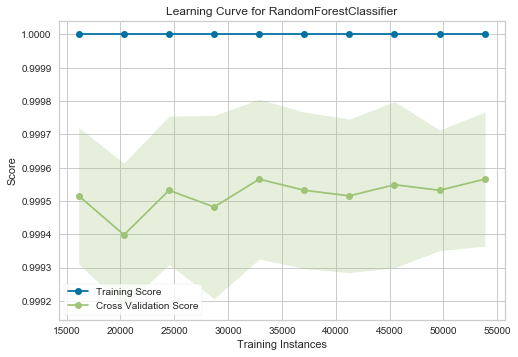

In [45]:
plot_model(estimator = tuned_rf, plot = 'learning')

### Plot AUC Curve

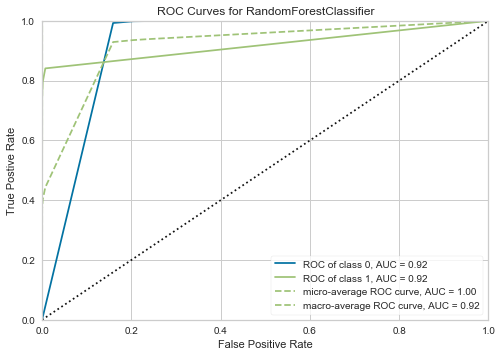

In [46]:
plot_model(estimator = tuned_rf, plot = 'auc')

### Confusion Matrix

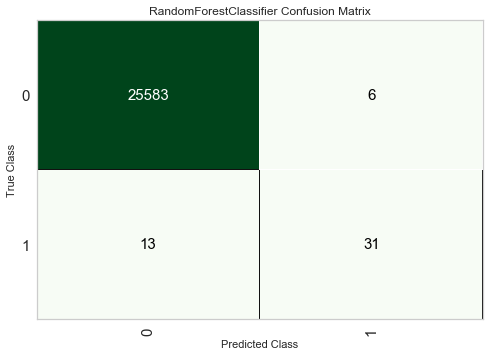

In [47]:
plot_model(estimator = tuned_rf, plot = 'confusion_matrix')

### Feature Importance

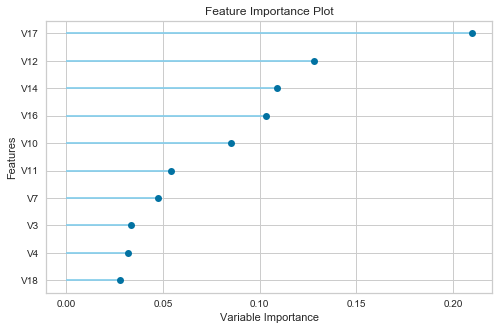

In [48]:
plot_model(estimator = tuned_rf, plot = 'feature')

### Evaluate Model

In [51]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Interpretation

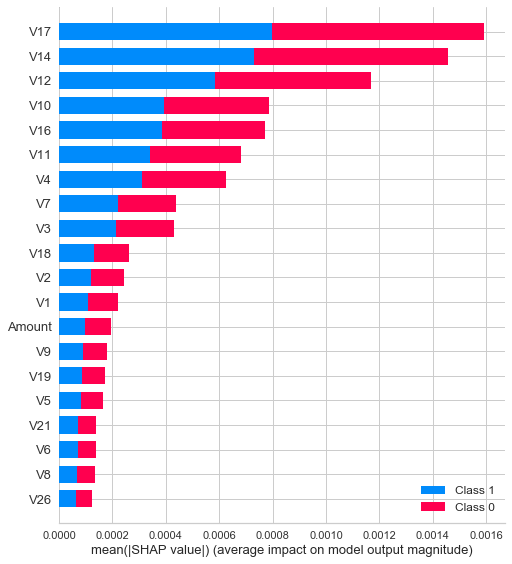

In [50]:
interpret_model(tuned_rf)

### Predict Model

In [53]:
predict_model(tuned_rf, data=credit)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Label,Score
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,0,0.0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,0,0.0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,0,0.0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,0,0.0


### Predictions

In [54]:
predictions = predict_model(tuned_rf, data=credit)
predictions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Label,Score
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0.0


## Conclusion

The highest values of Normal transactions are 25691.16 while of Fraudulent transactions are just 2125.87. The average value of normal transactions are small(USD 88.29) than fraudulent transactions that is USD 122.21
